### Synthetic data

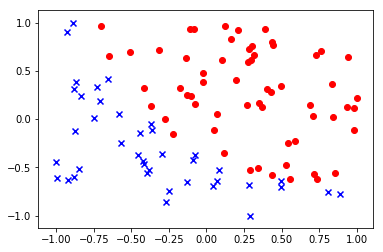

In [2]:
import numpy as np
import matplotlib.pyplot as plt

lines = np.loadtxt('data.csv', delimiter=',', dtype='str')
x_total = lines[:, 1:3].astype('float')
y_total = lines[:, 3].astype('float')

pos_index = np.where(y_total == 1)
neg_index = np.where(y_total == 0)
plt.scatter(x_total[pos_index, 0], x_total[pos_index, 1], marker='o', c='r')
plt.scatter(x_total[neg_index, 0], x_total[neg_index, 1], marker='x', c='b')
plt.show()

### sklearn

[2.79739336 2.57559894]
[0.51625502]
accuracy: 0.89


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


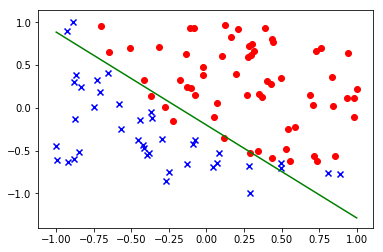

In [3]:
from sklearn import linear_model

lr_clf = linear_model.LogisticRegression()
lr_clf.fit(x_total, y_total)
print(lr_clf.coef_[0])
print(lr_clf.intercept_)

y_pred = lr_clf.predict(x_total)
print('accuracy:',(y_pred == y_total).mean())

plot_x = np.linspace(-1.0, 1.0, 100)
plot_y = - (lr_clf.coef_[0][0] * plot_x + lr_clf.intercept_) / lr_clf.coef_[0][1]
plt.scatter(x_total[pos_index, 0], x_total[pos_index, 1], marker='o', c='r')
plt.scatter(x_total[neg_index, 0], x_total[neg_index, 1], marker='x', c='b')
plt.plot(plot_x, plot_y, c='g')
plt.show()

### Tensorflow

current num_step: 0
loss 0.6931472
current num_step: 20
loss 0.6039114
current num_step: 40
loss 0.54275
current num_step: 60
loss 0.4978381
current num_step: 80
loss 0.46331117
current num_step: 100
loss 0.43591842
current num_step: 120
loss 0.4136666
current num_step: 140
loss 0.39524448
current num_step: 160
loss 0.37974834
current num_step: 180
loss 0.36653432
current num_step: 200
loss 0.35513207
current num_step: 220
loss 0.34519064
current num_step: 240
loss 0.3364435
current num_step: 260
loss 0.32868484
current num_step: 280
loss 0.32175338
current num_step: 300
loss 0.31552112
current num_step: 320
loss 0.30988526
current num_step: 340
loss 0.30476224
current num_step: 360
loss 0.30008364
current num_step: 380
loss 0.2957926
current num_step: 400
loss 0.2918419
current num_step: 420
loss 0.2881915
current num_step: 440
loss 0.2848077
current num_step: 460
loss 0.28166166
current num_step: 480
loss 0.27872857
current num_step: 500
loss 0.27598703
current num_step: 520
loss 0.2

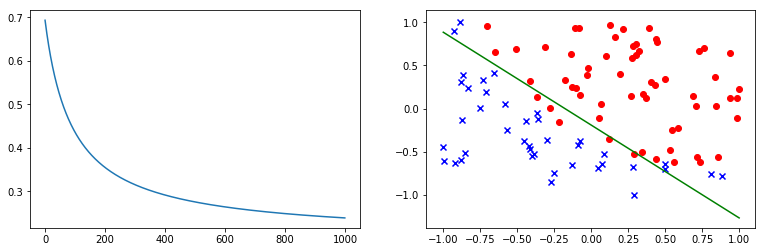

In [6]:
import tensorflow as tf

n_iterations = 1000
learning_rate = 0.1

x_tf = tf.placeholder(tf.float32)
y_tf = tf.placeholder(tf.float32)

w = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.constant(0.0, shape=[1]))

logit = tf.matmul(x_tf, w) + b
h = tf.squeeze(tf.nn.sigmoid(logit))
predict_label = tf.where(tf.squeeze(h) > 0.5, tf.ones(tf.shape(x_tf)[0]), tf.zeros(tf.shape(x_tf)[0]))
acc = tf.reduce_mean(tf.cast(tf.equal(predict_label, tf.cast(y_tf, dtype=tf.float32)), tf.float32))

# loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_tf, logits=logit))
loss = tf.reduce_mean(- y_tf * tf.log(h) - (1 - y_tf) * (tf.log(1 - h)))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_list = []
for i in range(n_iterations):
    l = sess.run(loss , feed_dict={x_tf: x_total, y_tf: y_total})
    if i % 20 == 0:
        print('current num_step:', i)
        print('loss', l)
    loss_list.append(l)
    sess.run(train_op, feed_dict={x_tf: x_total, y_tf: y_total})
print('accuracy:', sess.run(acc, feed_dict={x_tf: x_total, y_tf: y_total}))
loss_array = np.array(loss_list)
    
w_ = sess.run(w)
b_ = sess.run(b)

plt.figure(figsize=(13, 4))
plt.subplot(121)
plt.plot(np.arange(n_iterations), loss_array)
plt.subplot(122)
plot_x = np.linspace(-1.0, 1.0, 100)
plot_y = - (w_[0] * plot_x + b_) / w_[1]
plt.scatter(x_total[pos_index, 0], x_total[pos_index, 1], marker='o', c='r')
plt.scatter(x_total[neg_index, 0], x_total[neg_index, 1], marker='x', c='b')
plt.plot(plot_x, plot_y, c='g')

### Gradient Descent

current num_step: 0
loss 0.6931471805599453
current num_step: 20
loss 0.6039114100598901
current num_step: 40
loss 0.5427499908048159
current num_step: 60
loss 0.4978380969431532
current num_step: 80
loss 0.4633111710529931
current num_step: 100
loss 0.4359184183258201
current num_step: 120
loss 0.41366660610409123
current num_step: 140
loss 0.3952445233669363
current num_step: 160
loss 0.379748369496276
current num_step: 180
loss 0.3665343396006876
current num_step: 200
loss 0.3551320793552561
current num_step: 220
loss 0.3451906813001189
current num_step: 240
loss 0.33644355531417586
current num_step: 260
loss 0.32868487390747775
current num_step: 280
loss 0.3217533963694287
current num_step: 300
loss 0.3155211340160703
current num_step: 320
loss 0.3098852654047932
current num_step: 340
loss 0.30476227640532916
current num_step: 360
loss 0.3000836499754424
current num_step: 380
loss 0.29579265249853676
current num_step: 400
loss 0.29184190738069565
current num_step: 420
loss 0.288191

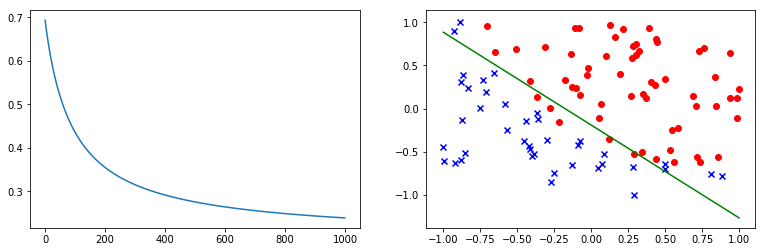

In [7]:
def sigmoid(z):
    result = 1.0 / (1.0 + np.exp(-1.0 * z))
    return result

n_iterations = 1000
learning_rate = 0.1

weight = np.zeros(3)
x_total_concat = np.hstack([x_total, np.ones([x_total.shape[0], 1])])

loss_list = []

loss_list = []
for i in range(n_iterations):
    loss = (- y_total * np.log(sigmoid(np.dot(x_total_concat, weight))) - (1 - y_total) * (np.log(1 - sigmoid(np.dot(x_total_concat, weight))))).mean()
    if i % 20 == 0:
        print('current num_step:', i)
        print('loss', loss)
    loss_list.append(loss)
    
    w_gradient = (x_total_concat * np.tile((sigmoid(np.dot(x_total_concat, weight)) - y_total).reshape([-1, 1]), 3)).mean(axis=0)
    weight = weight - learning_rate * w_gradient 

plt.figure(figsize=(13, 4))
plt.subplot(121)
plt.plot(np.arange(n_iterations), loss_list)
plt.subplot(122)
plot_x = np.linspace(-1.0, 1.0, 100)
plot_y = - (weight[0] * plot_x + weight[2]) / weight[1]
plt.scatter(x_total[pos_index, 0], x_total[pos_index, 1], marker='o', c='r')
plt.scatter(x_total[neg_index, 0], x_total[neg_index, 1], marker='x', c='b')
plt.plot(plot_x, plot_y, c='g')


### ROC, AUC

0.9720833333333334


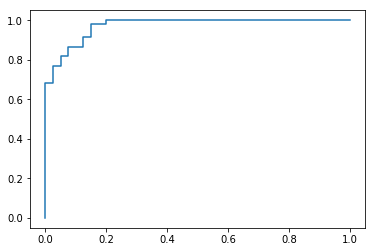

In [8]:
from sklearn.metrics import roc_curve, auc

y_score = sigmoid(np.dot(x_total_concat, weight)) 
fpr, tpr, threshold = roc_curve(y_total, y_score)
auc = auc(fpr, tpr)
print(auc)
plt.plot(fpr, tpr)
plt.show()

0.9720833333333333


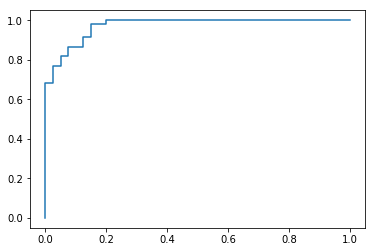

In [9]:
y_score_sorted = -np.sort(-y_score)
index = np.argsort(-y_score)
y_sorted = y_total[index]

tpr = [0]
fpr = [0]
TP = 0
FP = 0
n_neg = np.where(y_total == 0)[0].shape[0]
n_pos = np.where(y_total == 1)[0].shape[0]
for i in range(index.shape[0]):
    if y_sorted[i] == 1:
        TP += 1
    else:
        FP += 1
    tpr.append(TP / n_pos)
    fpr.append(FP / n_neg)
tpr.append(1)
fpr.append(1)
fpr = np.array(fpr)
tpr = np.array(tpr)
plt.plot(fpr, tpr)

fpr_delta = fpr[1:] - fpr[:-1]
auc = (fpr_delta * tpr[1:]).sum()
print(auc)
